# AA - Test Notes and Data for Group work

Importing necessary libraries

In [195]:
#import csv
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import matplotlib.dates as mdates
import seaborn as sns
#from calendar import day_name
from pandas.api.types import CategoricalDtype

import warnings;
warnings.filterwarnings('ignore');

## Getting the different files read into the notebook and explaining what data they contain. Furthermore first operation to check if all column names are read correctly.

<p>Information to the data in the booking file:<p>
The first few columns are the keys for the bookings, the effective category of a booking, the keys for a vehicle and the keys for a rented object (rented vehicle),the id of the customer and the keys for the station. It also cotains more detailed information on the bookings, as in when a booking started and when it ended, how long the booking took and how long the actual usage took and at what stations it started and ended (city). Furthermore, there are certain information on cetagories and companies. 
Notice that the documentation contains also the CATEGORY_HAL_ID column at the very end, which is missing here. 

In [196]:
booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", delimiter=';')

#if you have the problem that you cannot load this data, try to update your conda version and packages

In [3]:
booking_set.columns #die Datei von 2017 hat viel weniger Spalten als die Datei von 2016

Index(['BOOKING_HAL_ID', 'CATEGORY_HAL_ID', 'VEHICLE_HAL_ID',
       'CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL',
       'COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE',
       'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE',
       'END_RENTAL_ZONE_HAL_ID', 'RENTAL_ZONE_HAL_SRC', 'CITY_RENTAL_ZONE',
       'TECHNICAL_INCOME_CHANNEL'],
      dtype='object')

In [5]:
booking_set

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,21366843,51000,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,Nein,Nein,0.0,U-Bahn Baumwall,214170.0,Mönckebergstraße / Rosenstraße,131880.0,Standort,Hamburg,iPhone SRH
1,21367069,51000,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Nein,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Schulterblatt/Eifflerstraße,131648.0,Standort,Hamburg,Android SRH
2,21367072,51000,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Nein,Nein,0.0,Weidestraße/Biedermannplatz,211922.0,Jarrestraße / Rambatzweg,138376.0,Standort,Hamburg,Techniker HH_119 (-2334-)
3,21367118,51000,117519,A1062EF019B4E3E71C551572F1B284D55440E3C4,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Nein,Nein,0.0,Große Bergstraße / Jessenstraße,131649.0,Große Bergstraße / Jessenstraße,131649.0,Standort,Hamburg,Terminal HH_46 (-2115-)
4,21367155,51000,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Nein,Nein,0.0,Mundsburg / Schürbeker Straße,140799.0,Bartholomäusstraße/Beim Alten Schützenhof,211923.0,Standort,Hamburg,iPhone SRH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228293,46385755,51000,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:36:36,2017-05-16 07:44:16,Ja,Nein,0.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Neuer Pferdemarkt / Beim Grünen Jäger,131890.0,Standort,Hamburg,iPhone SRH
16228294,46385768,50000,165809,469EBC0DFB6D733E8C4AE1A7605B56170F7F636B,2017-05-16 07:37:07,2017-05-16 07:37:07,2017-05-16 08:09:42,Ja,Nein,0.0,Frankenallee / Schwalbacherstraße,214452.0,Frankenallee / Schwalbacherstraße,214452.0,Standort,Frankfurt am Main,IVR
16228295,46385839,51000,120488,CC6405146B51242A9169AB55E88A5C472EA1B2AA,2017-05-16 07:40:17,2017-05-16 07:40:17,2017-05-16 07:50:07,Ja,Nein,0.0,Weidestraße/Biedermannplatz,211922.0,Mundsburg / Schürbeker Straße,140799.0,Standort,Hamburg,Techniker HH_119 (-2334-)
16228296,46386510,50000,116623,AE105561D195C422985C2B3BB1A790C187DA3A70,2017-05-16 08:02:12,2017-05-16 08:02:12,2017-05-23 08:02:12,Ja,Nein,NaN,NaN,NaN,NaN,NaN,NaN,Darmstadt,iPhone CAB


In [29]:
booking_set['DISTANCE'].mean()

0.0

In [197]:
# just Frankfurt
booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]
booking_set_frankfurt

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
11,21366889,50000,106071,9C652AE093696A00AE03CE808E41FEB8207586E3,2014-01-01 00:46:33,2014-01-01 00:46:33,2014-01-01 00:54:20,Nein,Nein,0.0,Ostbahnhof,227447.0,NaN,NaN,Standort,Frankfurt am Main,iPhone CAB
17,21367245,50000,108136,52F601C735727653A8113E8AD5AC52E3BF89B492,2014-01-01 02:34:11,2014-01-01 02:34:11,2014-01-01 02:55:57,Nein,Nein,0.0,Carlo-Schmidt-Platz / Depot,214448.0,Rosa-Luxemburg-Straße / Ginnheimer Landstraße,231648.0,Standort,Frankfurt am Main,IVR
26,21367472,50000,109066,849E39869B95293B7F0DF50F3F4CC95ED129ED52,2014-01-01 03:27:52,2014-01-01 03:27:52,2014-01-01 03:31:29,Nein,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
30,21368072,50000,116406,D7EB6708429AFFCAC213B716FF7BA2C0D1FFCAAE,2014-01-01 07:01:31,2014-01-01 07:01:31,2014-01-01 07:07:57,Nein,Nein,0.0,Bettinaplatz / Bettinastraße,214394.0,NaN,NaN,Standort,Frankfurt am Main,IVR
31,21368145,50000,116338,58429BD51BD30BA6D2B41CCBA3E3EE733DE9D07B,2014-01-01 08:02:11,2014-01-01 08:02:11,2014-01-01 08:13:56,Nein,Nein,0.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228278,46382177,50000,163499,902CF8DEF6AA158418C036CCE6717D7551E671A3,2017-05-15 22:29:05,2017-05-15 22:29:05,2017-05-15 22:34:12,Ja,Nein,0.0,NaN,NaN,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Standort,Frankfurt am Main,IVR
16228279,46382184,50000,164121,A799BA8BA9892CBFF1CAA0C8481FAF49C27D2062,2017-05-15 22:29:25,2017-05-15 22:29:25,2017-05-15 22:43:06,Ja,Nein,0.0,Wendelsplatz / Darmstädter Landstraße,254302.0,Wittelsbacher Allee/ Habsburger Allee,227464.0,Standort,Frankfurt am Main,iPhone CAB
16228285,46382655,50000,165782,D940F501E7B61380A54B2AA0AD8DC7D6757237EF,2017-05-15 22:59:04,2017-05-15 22:59:04,2017-05-15 23:13:56,Ja,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,Arnsburger Straße / Mainkurstraße,227475.0,Standort,Frankfurt am Main,Android CAB
16228287,46383071,50000,164539,3D6E9CE1A4A554AF82B92020BCFAF4B6AC886446,2017-05-15 23:30:24,2017-05-15 23:30:24,2017-05-15 23:39:53,Ja,Nein,0.0,Bockenheimer Landstraße / Liebigstraße,31166.0,Kaufunger Straße / Kleine Seestraße,28835.0,Standort,Frankfurt am Main,iPhone CAB


In [8]:
booking_set_frankfurt.head(50)

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
11,21366889,50000,106071,9C652AE093696A00AE03CE808E41FEB8207586E3,2014-01-01 00:46:33,2014-01-01 00:46:33,2014-01-01 00:54:20,Nein,Nein,0.0,Ostbahnhof,227447.0,NaN,NaN,Standort,Frankfurt am Main,iPhone CAB
17,21367245,50000,108136,52F601C735727653A8113E8AD5AC52E3BF89B492,2014-01-01 02:34:11,2014-01-01 02:34:11,2014-01-01 02:55:57,Nein,Nein,0.0,Carlo-Schmidt-Platz / Depot,214448.0,Rosa-Luxemburg-Straße / Ginnheimer Landstraße,231648.0,Standort,Frankfurt am Main,IVR
26,21367472,50000,109066,849E39869B95293B7F0DF50F3F4CC95ED129ED52,2014-01-01 03:27:52,2014-01-01 03:27:52,2014-01-01 03:31:29,Nein,Nein,0.0,Roßmarkt / An der Hauptwache,214380.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
30,21368072,50000,116406,D7EB6708429AFFCAC213B716FF7BA2C0D1FFCAAE,2014-01-01 07:01:31,2014-01-01 07:01:31,2014-01-01 07:07:57,Nein,Nein,0.0,Bettinaplatz / Bettinastraße,214394.0,NaN,NaN,Standort,Frankfurt am Main,IVR
31,21368145,50000,116338,58429BD51BD30BA6D2B41CCBA3E3EE733DE9D07B,2014-01-01 08:02:11,2014-01-01 08:02:11,2014-01-01 08:13:56,Nein,Nein,0.0,Hauptbahnhof Haupteingang (Vorplatz),214419.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
44,21367003,50000,107577,9B13C458F8CA01D69ABE459C04DBE0E2C75CB8FF,2014-01-01 01:20:21,2014-01-01 01:20:21,2014-01-01 01:46:16,Nein,Nein,0.0,Fressgass,3961.0,NaN,NaN,Standort,Frankfurt am Main,IVR
67,21366884,50000,115938,9C652AE093696A00AE03CE808E41FEB8207586E3,2014-01-01 00:45:32,2014-01-01 00:45:32,2014-01-01 01:28:18,Nein,Nein,0.0,Ostbahnhof,227447.0,NaN,NaN,Standort,Frankfurt am Main,iPhone CAB
89,21367918,50000,116653,48F50AFC903A2D81556945290EDA7424BF6DC889,2014-01-01 05:35:03,2014-01-01 05:35:03,2014-01-01 05:39:05,Nein,Nein,0.0,U-Bahn Station Leipziger Strasse,226255.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
107,21367397,50000,117247,BE34AC9F7A0215B585F3006E50272443CBA339FF,2014-01-01 03:09:06,2014-01-01 03:09:06,2014-01-01 03:47:56,Nein,Nein,0.0,Carlo-Schmidt-Platz / Depot,214448.0,NaN,NaN,Standort,Frankfurt am Main,Android CAB
127,21367468,50000,116880,392249254464E00A0E6361FA408335FA48CC49E8,2014-01-01 03:27:02,2014-01-01 03:27:02,2014-01-01 03:33:32,Nein,Nein,0.0,Opernplatz / Fressgass,214375.0,NaN,NaN,Standort,Frankfurt am Main,IVR


# <font color='red'>START des Teils zur Bereinigung der Tabelle</font>

In [4]:
rental_zone_set = pd.read_csv("OPENDATA_RENTAL_ZONE_CALL_A_BIKE.csv", delimiter=';')

In [5]:
rental_zone_set_frankfurt = rental_zone_set[rental_zone_set['CITY'].str.contains('Frankfurt')]
rental_zone_set_new = rental_zone_set_frankfurt.loc[:,['RENTAL_ZONE_HAL_ID', 'NAME']] #show just these two columns
rental_zone_set_new = rental_zone_set_new.rename(columns={"RENTAL_ZONE_HAL_ID" : "START_RENTAL_ZONE_HAL_ID"})
rental_zone_set_new

,START_RENTAL_ZONE_HAL_ID,NAME
17,3710,Hausener Weg / Ludwig-Landmann-Straße
18,3717,Praunheimer Landstraße / Im Vogelsgesang
19,3916,Lokalbahnhof
20,3954,Kleinmarkthalle
21,3961,Fressgass
...,...,...
1043,259000,Brunnenweg/Wilhelm-Schramm-Straße
1044,259001,Bahnhof Bieber / Poststraße
1059,270558,Emil-Sulzbach Straße / Robert-Mayer Straße
1060,270559,Emil-Sulzbach Straße / Robert-Mayer Straße


In [6]:
booking_set_frankfurt_new = booking_set_frankfurt.loc[:,['START_RENTAL_ZONE_HAL_ID', 'START_RENTAL_ZONE']] #show just these two columns
booking_set_frankfurt_new

,START_RENTAL_ZONE_HAL_ID,START_RENTAL_ZONE
11,227447.0,Ostbahnhof
17,214448.0,Carlo-Schmidt-Platz / Depot
26,214380.0,Roßmarkt / An der Hauptwache
30,214394.0,Bettinaplatz / Bettinastraße
31,214419.0,Hauptbahnhof Haupteingang (Vorplatz)
...,...,...
16228278,NaN,NaN
16228279,254302.0,Wendelsplatz / Darmstädter Landstraße
16228285,214380.0,Roßmarkt / An der Hauptwache
16228287,31166.0,Bockenheimer Landstraße / Liebigstraße


In [59]:
isinstance(booking_set_frankfurt_new, pd.DataFrame)

True

In [60]:
isinstance(booking_set_frankfurt_new['START_RENTAL_ZONE_HAL_ID'], pd.DataFrame)

False

In [61]:
isinstance(booking_set_frankfurt_new['START_RENTAL_ZONE_HAL_ID'], pd.Series)

True

In [62]:
#booking_set_frankfurt_new['START_RENTAL_ZONE_HAL_ID'].drop(booking_set_frankfurt_new['START_RENTAL_ZONE_HAL_ID'].index[1])
booking_set_frankfurt_new['START_RENTAL_ZONE_HAL_ID'].head()

11    227447.0
17    214448.0
26    214380.0
30    214394.0
31    214419.0
Name: START_RENTAL_ZONE_HAL_ID, dtype: float64

In [63]:
booking_set_frankfurt_new['START_RENTAL_ZONE'].head()

11                              Ostbahnhof
17            Carlo-Schmidt-Platz  / Depot
26            Roßmarkt / An der Hauptwache
30            Bettinaplatz / Bettinastraße
31    Hauptbahnhof Haupteingang (Vorplatz)
Name: START_RENTAL_ZONE, dtype: object

In [64]:
isinstance(rental_zone_set_new['START_RENTAL_ZONE_HAL_ID'], pd.Series)


True

In [66]:
rental_zone_set_new['NAME'].head()

17       Hausener Weg / Ludwig-Landmann-Straße
18    Praunheimer Landstraße / Im Vogelsgesang
19                                Lokalbahnhof
20                             Kleinmarkthalle
21                                   Fressgass
Name: NAME, dtype: object

In [7]:
rental_zone_set_new['START_RENTAL_ZONE_HAL_ID'] = rental_zone_set_new['START_RENTAL_ZONE_HAL_ID'].astype('float64')
rental_zone_set_new['START_RENTAL_ZONE_HAL_ID'].head()

17    3710.0
18    3717.0
19    3916.0
20    3954.0
21    3961.0
Name: START_RENTAL_ZONE_HAL_ID, dtype: float64

In [68]:
booking_set_frankfurt_new['START_RENTAL_ZONE_HAL_ID'].get(key=11)

227447.0

In [23]:
result = pd.merge(booking_set_frankfurt_new, rental_zone_set_new, on='START_RENTAL_ZONE_HAL_ID', how='inner')

In [25]:
result #why the fuck is is throwing out the null values for rental zone name and not the id for inner join???
#its actually even a few less
#i dont know what the fuck is going on

,START_RENTAL_ZONE_HAL_ID,START_RENTAL_ZONE,NAME
0,227447.0,Ostbahnhof,Ostbahnhof
1,227447.0,Ostbahnhof,Ostbahnhof
2,227447.0,Ostbahnhof,Ostbahnhof
3,227447.0,Ostbahnhof,Ostbahnhof
4,227447.0,Ostbahnhof,Ostbahnhof
...,...,...,...
1801514,272652.0,Niddastraße / Weserstraße,Niddastraße / Weserstraße
1801515,272652.0,Niddastraße / Weserstraße,Niddastraße / Weserstraße
1801516,272652.0,Niddastraße / Weserstraße,Niddastraße / Weserstraße
1801517,272652.0,Niddastraße / Weserstraße,Niddastraße / Weserstraße


In [26]:
result.START_RENTAL_ZONE.fillna(result.NAME, inplace=True)
#del result2['NAME']
#result.columns = 'START_RENTAL_ZONE_HAL_ID START_RENTAL_ZONE'.split()

In [27]:
result.isna().sum(axis = 0)

START_RENTAL_ZONE_HAL_ID    0
START_RENTAL_ZONE           0
NAME                        0
dtype: int64

In [22]:
result.isnull().sum()

START_RENTAL_ZONE_HAL_ID    106056
START_RENTAL_ZONE           341791
NAME                        341859
dtype: int64

# fuck this

In [98]:
#for j in range(0, rental_zone_set_new['START_RENTAL_ZONE_HAL_ID'].size):
#    print(rental_zone_set_new['START_RENTAL_ZONE'].iloc[j])


In [99]:
#wo start rental zone id gleich einer id aus der liste ist, setze die namen auf die namen der liste, wenn vorher NaN
#gleiches für Ende
#noch mal isna sum durchführen
#iteriere über tabelle, lese den wert zur id
# vergleiche zum id wert in der anderen tabelle
# wenn gleich
# lese den wert von der anderen tabelle zum namen der station
# füge den namen der station in die erste tabelle ein


#iterate over each row in booking_set_frankfurt
#clmn = list(booking_set_frankfurt)
##rental_zone_set_new.sort_index(inplace=True)
#booking_set_frankfurt.sort_index(inplace=True)

    
#for i in range(0, booking_set_frankfurt_new['START_RENTAL_ZONE_HAL_ID'].size):
#    val = booking_set_frankfurt_new['START_RENTAL_ZONE_HAL_ID'].iloc[i]
#    #startname = booking_set_frankfurt_new['START_RENTAL_ZONE'].iloc[i]
    
#    for j in range(0, rental_zone_set_new['START_RENTAL_ZONE_HAL_ID'].size):
#        valtwo = rental_zone_set_new['START_RENTAL_ZONE_HAL_ID'].iloc[j]
#        stationname = rental_zone_set_new['START_RENTAL_ZONE'].iloc[j]

#        result = booking_set_frankfurt_new['START_RENTAL_ZONE'].apply(lambda x : stationname if val == valtwo else x)

    

In [75]:
booking_set_frankfurt_new.isna().sum(axis = 0)

START_RENTAL_ZONE_HAL_ID    106056
START_RENTAL_ZONE           341791
dtype: int64

# <font color='red'>ENDE des Teils zur Bereinigung der Tabelle</font>

In [76]:
#booking_set_frankfurt.isna().sum(axis = 0)

In [28]:
booking_set_frankfurt['DISTANCE'].mean()

0.0

In [12]:
 booking_set_frankfurt.isnull().sum() #find out the amount of null values in columns

BOOKING_HAL_ID                    0
CATEGORY_HAL_ID                   0
VEHICLE_HAL_ID                    0
CUSTOMER_HAL_ID                   0
DATE_BOOKING                      0
DATE_FROM                         0
DATE_UNTIL                        0
COMPUTE_EXTRA_BOOKING_FEE         0
TRAVERSE_USE                      0
DISTANCE                        122
START_RENTAL_ZONE            341791
START_RENTAL_ZONE_HAL_ID     106056
END_RENTAL_ZONE              361370
END_RENTAL_ZONE_HAL_ID       128863
RENTAL_ZONE_HAL_SRC           30820
CITY_RENTAL_ZONE                  0
TECHNICAL_INCOME_CHANNEL      28490
dtype: int64

In [10]:
booking_set_frankfurt = booking_set_frankfurt.loc[:,['BOOKING_HAL_ID', 'DATE_BOOKING']] #show just these two columns
#booking_set_frankfurt = booking_set_frankfurt.dropna(axis=0) #drop all rows that have empty values (NaN values)
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
booking_set_frankfurt

,BOOKING_HAL_ID,DATE_BOOKING
281,21366826,2014-01-01 00:30:23
302,21366878,2014-01-01 00:44:05
509,21366882,2014-01-01 00:45:02
67,21366884,2014-01-01 00:45:32
11,21366889,2014-01-01 00:46:33
...,...,...
16227888,46386849,2017-05-16 08:13:05
16228266,46386851,2017-05-16 08:13:08
16227184,46386855,2017-05-16 08:13:17
16227537,46386859,2017-05-16 08:13:29


In [11]:
# set start date and beginning date: change date format if needed
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]
booking_set_frankfurt_20152016

,BOOKING_HAL_ID,DATE_BOOKING
4284612,27689006,2015-01-01 00:21:22
4285336,27689041,2015-01-01 00:30:20
4285873,27689080,2015-01-01 00:42:51
4286542,27689151,2015-01-01 01:00:19
4286567,27689154,2015-01-01 01:00:47
...,...,...
14613160,43561784,2016-12-31 23:13:00
14613511,43561828,2016-12-31 23:23:28
14612056,43561832,2016-12-31 23:24:03
14615815,43561863,2016-12-31 23:28:04


## Anzahl Buchungen Frankfurt auf beide Jahre:
- insgesamt: 16.228.298 
- nur in Frankfurt: 2.143.378
- in der Zeit zwischen dem 2015/01/01 und 2016/12/31: 1.431.643


## Anzahl Buchungen Frankfurt 2015:

In [26]:
start_date_2015 = '2015-01-01 00:00:00'
end_date_2015 = '2015-12-31 23:59:59'
filtered_dates_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_2015)
booking_set_frankfurt_2015 = booking_set_frankfurt.loc[filtered_dates_2015]
booking_set_frankfurt_2015

,BOOKING_HAL_ID,DATE_BOOKING
4284612,27689006,2015-01-01 00:21:22
4285336,27689041,2015-01-01 00:30:20
4285873,27689080,2015-01-01 00:42:51
4286542,27689151,2015-01-01 01:00:19
4286567,27689154,2015-01-01 01:00:47
...,...,...
8910063,34947687,2015-12-31 23:18:05
8909106,34947697,2015-12-31 23:19:40
8914589,34947717,2015-12-31 23:22:36
8909758,34947732,2015-12-31 23:28:19


Ergebnis: 516.605

In [27]:
#in case we need it, regular expression for the month: [0-9]{4}-[0-9]{2}
booking_set_frankfurt_2015['month_year'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.to_period('M')
#booking_set_frankfurt_2015['month_year'].value_counts()
booking_set_frankfurt_2015['month_year'].value_counts(normalize=True) #get percentage


2015-08    0.129848
2015-07    0.120024
2015-06    0.101987
2015-05    0.093660
2015-09    0.090320
2015-10    0.085255
2015-11    0.083222
2015-04    0.081736
2015-12    0.068958
2015-03    0.064659
2015-01    0.041304
2015-02    0.039028
Freq: M, Name: month_year, dtype: float64

Ergebnis für absolute Ergebnisse:
- 2015-08    67.080
- 2015-07    62.005
- 2015-06    52.687
- 2015-05    48.385
- 2015-09    46.660
- 2015-10    44.043
- 2015-11    42.993
- 2015-04    42.225
- 2015-12    35.624
- 2015-03    33.403
- 2015-01    21.338
- 2015-02    20.162

## Anzahl Buchungen Frankfurt 2016:

In [28]:
start_date_2016 = '2016-01-01 00:00:00'
end_date_2016 = '2016-12-31 23:59:59'
filtered_dates_2016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_2016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_2016)
booking_set_frankfurt_2016 = booking_set_frankfurt.loc[filtered_dates_2016]
booking_set_frankfurt_2016

,BOOKING_HAL_ID,DATE_BOOKING
8909418,34947898,2016-01-01 00:12:33
8914012,34947899,2016-01-01 00:12:46
8910295,34947919,2016-01-01 00:23:17
8908794,34947924,2016-01-01 00:24:44
8909404,34947929,2016-01-01 00:25:45
...,...,...
14613160,43561784,2016-12-31 23:13:00
14613511,43561828,2016-12-31 23:23:28
14612056,43561832,2016-12-31 23:24:03
14615815,43561863,2016-12-31 23:28:04


Ergebnis: 915.038

In [29]:
booking_set_frankfurt_2016['month_year'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.to_period('M')
#booking_set_frankfurt_2016['month_year'].value_counts() 
#normalize = true gives you the relative values
booking_set_frankfurt_2016['month_year'].value_counts(normalize=True)

2016-08    0.134741
2016-07    0.122666
2016-09    0.118426
2016-06    0.114547
2016-05    0.107976
2016-04    0.090661
2016-10    0.073858
2016-11    0.060682
2016-03    0.051411
2016-12    0.044442
2016-02    0.044056
2016-01    0.036535
Freq: M, Name: month_year, dtype: float64

## Anzahl Buchungen Frankfurt auf die Jahreszeiten:


In [30]:
## Dezember, Januar, Februar
#2015
start_date_winter_2015 = '2015-01-01 00:00:00'
end_date_winter_2015 = '2015-02-28 23:59:59'
start_date_dec_2015 = '2015-12-01 00:00:00'
end_date_dec_2015 = '2015-12-31 23:59:59'
filtered_dates_dec_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_dec_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_dec_2015) 
booking_set_frankfurt_dec_2015 = booking_set_frankfurt.loc[filtered_dates_dec_2015]
filtered_dates_winter_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_winter_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_dec_2015) 
booking_set_frankfurt_winter_2015 = booking_set_frankfurt.loc[filtered_dates_winter_2015]
winter_2015 = pd.merge(booking_set_frankfurt_dec_2015, booking_set_frankfurt_winter_2015)
winter_2015
# okay hier spackt er, das muss noch geändert werden

,BOOKING_HAL_ID,DATE_BOOKING
0,34451014,2015-12-01 00:01:14
1,34451039,2015-12-01 00:05:35
2,34451050,2015-12-01 00:07:01
3,34451051,2015-12-01 00:07:05
4,34451064,2015-12-01 00:08:25
...,...,...
35619,34947687,2015-12-31 23:18:05
35620,34947697,2015-12-31 23:19:40
35621,34947717,2015-12-31 23:22:36
35622,34947732,2015-12-31 23:28:19


In [31]:
## März, April, Mai
start_date_spring_2015 = '2015-03-01 00:00:00'
end_date_spring_2015 = '2015-05-31 23:59:59'
filtered_dates_spring_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_spring_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_spring_2015)
booking_set_frankfurt_spring_2015 = booking_set_frankfurt.loc[filtered_dates_spring_2015]
booking_set_frankfurt_spring_2015

,BOOKING_HAL_ID,DATE_BOOKING
4613273,28356212,2015-03-01 00:00:11
4613211,28356262,2015-03-01 00:11:22
4612966,28356281,2015-03-01 00:16:26
4614362,28356284,2015-03-01 00:16:58
4612668,28356309,2015-03-01 00:21:41
...,...,...
5735664,30141540,2015-05-31 23:46:10
5740159,30141566,2015-05-31 23:51:55
5732560,30141571,2015-05-31 23:53:12
5735701,30141576,2015-05-31 23:54:01


In [32]:
## Sommer  Juni, Juli, August
start_date_summer_2015 = '2015-06-01 00:00:00'
end_date_summer_2015 = '2015-08-31 23:59:59'
filtered_dates_summer_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_summer_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_summer_2015)
booking_set_frankfurt_summer_2015 = booking_set_frankfurt.loc[filtered_dates_summer_2015]
booking_set_frankfurt_summer_2015

,BOOKING_HAL_ID,DATE_BOOKING
5734026,30141616,2015-06-01 00:02:22
5735467,30141637,2015-06-01 00:05:41
5739521,30141638,2015-06-01 00:06:14
5736218,30141639,2015-06-01 00:06:14
5736382,30141658,2015-06-01 00:10:44
...,...,...
7469969,32604746,2015-08-31 23:53:50
7463229,32604748,2015-08-31 23:53:53
7464666,32604784,2015-08-31 23:57:46
7463743,32604788,2015-08-31 23:58:15


In [33]:
## Herbst  September, Oktober, November
start_date_fall_2015 = '2015-09-01 00:00:00'
end_date_fall_2015 = '2015-11-30 23:59:59'
filtered_dates_fall_2015 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_fall_2015) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_fall_2015)
booking_set_frankfurt_fall_2015 = booking_set_frankfurt.loc[filtered_dates_fall_2015]
booking_set_frankfurt_fall_2015

,BOOKING_HAL_ID,DATE_BOOKING
7465906,32604816,2015-09-01 00:01:13
7464562,32604822,2015-09-01 00:01:45
7465883,32604835,2015-09-01 00:03:06
7463981,32604862,2015-09-01 00:07:45
7463916,32604873,2015-09-01 00:09:57
...,...,...
8628140,34450941,2015-11-30 23:46:33
8629132,34450942,2015-11-30 23:46:47
8627484,34450946,2015-11-30 23:47:22
8628455,34450967,2015-11-30 23:50:24


In [34]:
#den gleichen shit nochmal für 2016

## Buchungszahl in Bezug auf die Wochentage


In [35]:
#2015 Buchungen pro Tag

In [36]:
booking_set_frankfurt_2015.groupby(booking_set_frankfurt_2015['DATE_BOOKING'].dt.weekday_name).size()

DATE_BOOKING
Friday       80186
Monday       75581
Saturday     54597
Sunday       48097
Thursday     84268
Tuesday      84773
Wednesday    89103
dtype: int64

In [37]:
#2016 Buchungen pro Tag 
booking_set_frankfurt_2016.groupby(booking_set_frankfurt_2016['DATE_BOOKING'].dt.weekday_name).size()

DATE_BOOKING
Friday       142620
Monday       134298
Saturday     100460
Sunday        92153
Thursday     149151
Tuesday      144291
Wednesday    152065
dtype: int64

## Buchungszahl in Bezug auf die einzelnen Stunden je Wochentag

In [38]:
#2015 #gesamte Stunden in der Woche
booking_set_frankfurt_2015.groupby(booking_set_frankfurt_2015['DATE_BOOKING'].dt.hour).size()

DATE_BOOKING
0      8928
1      8431
2      6252
3      4281
4      2423
5      2818
6      7045
7     25520
8     44169
9     27011
10    17914
11    21480
12    28363
13    28429
14    25298
15    29197
16    35486
17    41593
18    42283
19    34412
20    25835
21    19866
22    16836
23    12735
dtype: int64

In [39]:
#2015 Stunden der einzelnen Wochentage #ignore warning for now
booking_set_frankfurt_2015['year'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_2015['month'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_2015['date'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_2015['hour'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_2015['Day_of_week'] = booking_set_frankfurt_2015['DATE_BOOKING'].dt.strftime('%a')

#booking_set_frankfurt_2015.head()


In [40]:
#booking_set_frankfurt_2015.groupby(['hour', 'Day_of_week']).size().reset_index().groupby('Day_of_week')[[0]].max()
#booking_set_frankfurt_2015.pivot_table(index='hour',columns='Day_of_week',aggfunc=len)

In [41]:
#just use the first option if you really want to see all rows
#pd.set_option('display.max_rows', 168)
res = booking_set_frankfurt_2015.groupby(["Day_of_week", "hour"]).size()
res.to_frame()
#probably still going to change since the data frame isn't optimal, maybe possible using a pivot table
#better: 
#    0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
# M
# T
# W
# T
# F
# S
# S

0
Day_of_week hour      
Fri         00    1385
            01    1274
            02     934
            03     559
            04     265
...                ...
Wed         19    6177
            20    4346
            21    3470
            22    2989
            23    2163

[168 rows x 1 columns]

In [42]:
#2016 #gesamte Stunden in der Woche
booking_set_frankfurt_2016.groupby(booking_set_frankfurt_2016['DATE_BOOKING'].dt.hour).size()

DATE_BOOKING
0     16041
1     13891
2      9935
3      6296
4      4028
5      4655
6     11871
7     41964
8     74818
9     47164
10    30976
11    37808
12    49164
13    51004
14    46584
15    52091
16    61370
17    74800
18    77994
19    63420
20    48558
21    36674
22    30323
23    23609
dtype: int64

In [43]:
# 2016 Stunden der einzelnen Wochentage #ignore warnings for now
booking_set_frankfurt_2016['year'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_2016['month'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_2016['date'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_2016['hour'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_2016['Day_of_week'] = booking_set_frankfurt_2016['DATE_BOOKING'].dt.strftime('%a')

#just use the first option if you really want to see all rows
#pd.set_option('display.max_rows', 168)
res2 = booking_set_frankfurt_2016.groupby(["Day_of_week", "hour"], as_index = False).size()
res2.to_frame()

0
Day_of_week hour       
Fri         00     2523
            01     2018
            02     1312
            03      790
            04      433
...                 ...
Wed         19    11114
            20     8483
            21     6035
            22     5416
            23     3903

[168 rows x 1 columns]

## Durchschnittliche Buchungsdauer (ggf mit Varianz) je Wochentag je Stunde

In [154]:
#berechne Dauer einer Buchung 
#mach ggf extra spalte draus
#wie viele dauern buchungen in der und der zeit um Durchschnitt mit Abstand zur längsten und kürzesten Buchung
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]


In [155]:
booking_set_frankfurt_20152016['DATE_UNTIL'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_UNTIL'])
booking_set_frankfurt_20152016['DATE_UNTIL'].dt.strftime('%Y-%m-%d %X')
booking_set_frankfurt_20152016['DATE_FROM'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_FROM'])
booking_set_frankfurt_20152016['DATE_FROM'].dt.strftime('%Y-%m-%d %X')

4284612     2015-01-01 00:21:22
4285336     2015-01-01 00:30:20
4285873     2015-01-01 00:42:51
4286542     2015-01-01 01:00:19
4286567     2015-01-01 01:00:47
                   ...         
14613160    2016-12-31 23:13:00
14613511    2016-12-31 23:23:28
14612056    2016-12-31 23:24:03
14615815    2016-12-31 23:28:04
14612244    2016-12-31 23:40:33
Name: DATE_FROM, Length: 1431643, dtype: object

In [156]:
booking_set_frankfurt_20152016['duration'] = booking_set_frankfurt_20152016['DATE_UNTIL'] - booking_set_frankfurt_20152016['DATE_FROM']
booking_set_frankfurt20152016_duration = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL', 'duration']]
booking_set_frankfurt20152016_duration

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,duration
4284612,27689006,2015-01-01 00:21:22,2015-01-01 00:21:22,2015-01-01 00:25:18,0 days 00:03:56
4285336,27689041,2015-01-01 00:30:20,2015-01-01 00:30:20,2015-01-01 00:41:52,0 days 00:11:32
4285873,27689080,2015-01-01 00:42:51,2015-01-01 00:42:51,2015-01-01 01:08:49,0 days 00:25:58
4286542,27689151,2015-01-01 01:00:19,2015-01-01 01:00:19,2015-01-01 01:11:19,0 days 00:11:00
4286567,27689154,2015-01-01 01:00:47,2015-01-01 01:00:47,2015-01-01 01:11:20,0 days 00:10:33
...,...,...,...,...,...
14613160,43561784,2016-12-31 23:13:00,2016-12-31 23:13:00,2017-01-02 08:21:32,1 days 09:08:32
14613511,43561828,2016-12-31 23:23:28,2016-12-31 23:23:28,2016-12-31 23:45:59,0 days 00:22:31
14612056,43561832,2016-12-31 23:24:03,2016-12-31 23:24:03,2016-12-31 23:32:50,0 days 00:08:47
14615815,43561863,2016-12-31 23:28:04,2016-12-31 23:28:04,2016-12-31 23:33:25,0 days 00:05:21


In [ ]:
duration_oneminute = booking_set_frankfurt20152016_duration[booking_set_frankfurt20152016_duration.duration < '00:05:00']
print(duration_oneminute.shape)

So, there are roughly 5000 bookings that are under a minute. what are we supposed to do with those??

Just checked before: 
1. 1 Minute: 5412
2. 2 Minutes: 21464
3. 3 Minutes: 44362
4. 4 Minutes: 94586
5. 5 Minutes: 166839

In [94]:
duration_oneday = booking_set_frankfurt20152016_duration[booking_set_frankfurt20152016_duration.duration > '14 days 00:00:00']
print(duration_oneday.shape)

(94, 10)


1. 1 Day: 3115
2. 2 Days: 1159
3. 3 Days: 661
4. 4 Days: 440
5. Days: 323
6. Days: 239
7. Days: 198
8. Days: 162
9. Days: 146
10. Days: 136
11. Days: 125
12. Days: 109
13. Days: 98
14. Days: 94

In [157]:
booking_set_frankfurt20152016_duration['year'] = booking_set_frankfurt20152016_duration['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt20152016_duration['month'] = booking_set_frankfurt20152016_duration['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt20152016_duration['date'] = booking_set_frankfurt20152016_duration['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt20152016_duration['hour'] = booking_set_frankfurt20152016_duration['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt20152016_duration['Day_of_week'] = booking_set_frankfurt20152016_duration['DATE_BOOKING'].dt.strftime('%a')

In [8]:
booking_set_frankfurt20152016_duration

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,duration,year,month,date,hour,Day_of_week
4284612,27689006,2015-01-01 00:21:22,2015-01-01 00:21:22,2015-01-01 00:25:18,0 days 00:03:56,2015,Jan,01,00,Thu
4285336,27689041,2015-01-01 00:30:20,2015-01-01 00:30:20,2015-01-01 00:41:52,0 days 00:11:32,2015,Jan,01,00,Thu
4285873,27689080,2015-01-01 00:42:51,2015-01-01 00:42:51,2015-01-01 01:08:49,0 days 00:25:58,2015,Jan,01,00,Thu
4286542,27689151,2015-01-01 01:00:19,2015-01-01 01:00:19,2015-01-01 01:11:19,0 days 00:11:00,2015,Jan,01,01,Thu
4286567,27689154,2015-01-01 01:00:47,2015-01-01 01:00:47,2015-01-01 01:11:20,0 days 00:10:33,2015,Jan,01,01,Thu
...,...,...,...,...,...,...,...,...,...,...
14613160,43561784,2016-12-31 23:13:00,2016-12-31 23:13:00,2017-01-02 08:21:32,1 days 09:08:32,2016,Dec,31,23,Sat
14613511,43561828,2016-12-31 23:23:28,2016-12-31 23:23:28,2016-12-31 23:45:59,0 days 00:22:31,2016,Dec,31,23,Sat
14612056,43561832,2016-12-31 23:24:03,2016-12-31 23:24:03,2016-12-31 23:32:50,0 days 00:08:47,2016,Dec,31,23,Sat
14615815,43561863,2016-12-31 23:28:04,2016-12-31 23:28:04,2016-12-31 23:33:25,0 days 00:05:21,2016,Dec,31,23,Sat


In [158]:
booking_duration = booking_set_frankfurt20152016_duration.loc[:,['BOOKING_HAL_ID', 'Day_of_week', 'hour', 'duration']]
booking_duration

,BOOKING_HAL_ID,Day_of_week,hour,duration
4284612,27689006,Thu,00,0 days 00:03:56
4285336,27689041,Thu,00,0 days 00:11:32
4285873,27689080,Thu,00,0 days 00:25:58
4286542,27689151,Thu,01,0 days 00:11:00
4286567,27689154,Thu,01,0 days 00:10:33
...,...,...,...,...
14613160,43561784,Sat,23,1 days 09:08:32
14613511,43561828,Sat,23,0 days 00:22:31
14612056,43561832,Sat,23,0 days 00:08:47
14615815,43561863,Sat,23,0 days 00:05:21


In [159]:
#pd.to_timedelta(booking_duration.duration)/np.timedelta64(1, 's')
#booking_duration['duration'] = booking_duration['duration'].dt.total_seconds()
#here convert to date time to something numeric
booking_duration['duration'] = pd.to_numeric(booking_duration['duration'])

In [160]:
#res3 = booking_duration.groupby(["Day_of_week", "hour"])['duration'].mean()

booking_duration.duration.dtype

dtype('int64')

In [161]:
booking_duration_mean = booking_duration.groupby(["Day_of_week", "hour"], as_index = False)['duration'].mean()

In [162]:
#booking_duration_mean['duration'].astype(int)

In [163]:
booking_duration_mean

,Day_of_week,hour,duration
0,Fri,00,1.926478e+12
1,Fri,01,1.563322e+12
2,Fri,02,1.519035e+12
3,Fri,03,1.895571e+12
4,Fri,04,3.706997e+12
...,...,...,...
163,Wed,19,2.098349e+12
164,Wed,20,1.885850e+12
165,Wed,21,1.455970e+12
166,Wed,22,1.338908e+12


In [164]:
#booking_duration_mean['duration'] = pd.to_datetime(booking_duration_mean['duration'].astype(str), format='%X')
booking_duration_mean['duration'] = pd.to_timedelta(booking_duration_mean['duration'])

In [76]:
#booking_duration_mean['duration']

In [77]:
#booking_duration.groupby(["Day_of_week", "hour"], as_index = False)['duration'].describe()

In [78]:
 #booking_duration_mean['duration'] = booking_duration_mean['duration'].dt.strftime('%D %X')

In [102]:
#booking_duration_mean['Max'] = booking_duration.groupby(["Day_of_week", "hour"], as_index = False)['duration'].idxmax()

In [105]:
#booking_duration_mean['Min'] = booking_duration.groupby(['Day_of_week', 'hour'])['duration'].min()

In [165]:
booking_duration_mean

,Day_of_week,hour,duration
0,Fri,00,00:32:06.477737
1,Fri,01,00:26:03.322296
2,Fri,02,00:25:19.035173
3,Fri,03,00:31:35.570793
4,Fri,04,01:01:46.997134
...,...,...,...
163,Wed,19,00:34:58.349256
164,Wed,20,00:31:25.850417
165,Wed,21,00:24:15.969805
166,Wed,22,00:22:18.907555


In [166]:
booking_duration['duration'] = pd.to_numeric(booking_duration['duration'])
booking_duration_mean = booking_duration.groupby(["Day_of_week"], as_index = False)['duration'].mean()
booking_duration_mean['duration'] = pd.to_timedelta(booking_duration_mean['duration'])
booking_duration_mean

,Day_of_week,duration
0,Fri,00:31:32.055644
1,Mon,00:35:32.290815
2,Sat,00:40:40.699059
3,Sun,00:38:56.724427
4,Thu,00:30:32.577930
5,Tue,00:30:19.203179
6,Wed,00:28:09.494671


In [170]:
booking_duration_mean['Day_of_week'].dtype

dtype('O')

In [179]:
sorter = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sorterIndex = dict(zip(sorter,range(len(sorter))))
booking_duration_mean['Day_id'] = booking_duration_mean.index
booking_duration_mean['Day_id'] = booking_duration_mean['Day_of_week'].map(sorterIndex)
booking_duration_mean.sort_values('Day_id', inplace=True)

In [180]:
booking_duration_mean

,Day_of_week,duration,Day_id
1,Mon,00:35:32.290815,0
5,Tue,00:30:19.203179,1
6,Wed,00:28:09.494671,2
4,Thu,00:30:32.577930,3
0,Fri,00:31:32.055644,4
2,Sat,00:40:40.699059,5
3,Sun,00:38:56.724427,6


In [181]:
booking_duration_mean['duration']  = round(booking_duration_mean['duration'].dt.total_seconds()/60)

In [182]:
booking_duration_mean.duration.dtype

dtype('float64')

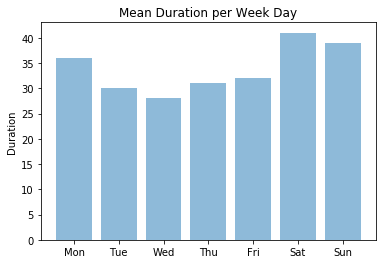

In [183]:
y_pos = np.arange(len(booking_duration_mean['Day_of_week']))
plt.bar(y_pos, booking_duration_mean['duration'], align='center', alpha=0.5)
plt.xticks(y_pos, booking_duration_mean['Day_of_week'])
plt.ylabel('Duration')
plt.title('Mean Duration per Week Day')

plt.show()

# Strecken

In [193]:
#use vehicle hal id to see how many vehicles are at one station at a time 
booking_set_frankfurt['VEHICLE_HAL_ID'].nunique()

3765

In [194]:
booking_set_frankfurt['VEHICLE_HAL_ID'].unique() #gives out the vehicle ids in array form 

array([115939, 116954, 119442, ..., 143849, 116546, 116745], dtype=int64)

In [209]:
#again change to the required dates
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True) #sort the data after the date, ascending
booking_set_frankfurt['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'])
booking_set_frankfurt['DATE_BOOKING'].dt.strftime('%Y-%m-%d %X')
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]

In [210]:
#set again a new table for the routes
booking_set_frankfurt_20152016['year'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%Y')
booking_set_frankfurt_20152016['month'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%b')
booking_set_frankfurt_20152016['date'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%d')
booking_set_frankfurt_20152016['hour'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%H')
booking_set_frankfurt_20152016['Day_of_week'] = booking_set_frankfurt_20152016['DATE_BOOKING'].dt.strftime('%a')

In [202]:
booking_set_frankfurt_20152016

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,year,month,date,hour,Day_of_week
4284612,27689006,50000,110326,94E208715C9AA8B3258F2CF2BCF421FE059DFAAA,2015-01-01 00:21:22,2015-01-01 00:21:22,2015-01-01 00:25:18,Nein,Nein,0.0,...,NaN,12635.0,Standort,Frankfurt am Main,iPhone CAB,2015,Jan,01,00,Thu
4285336,27689041,50000,115667,0284A643498771058AA8BB3555DF8828D6D08635,2015-01-01 00:30:20,2015-01-01 00:30:20,2015-01-01 00:41:52,Nein,Nein,0.0,...,Beethovenstraße / Beethovenplatz,214393.0,Standort,Frankfurt am Main,IVR,2015,Jan,01,00,Thu
4285873,27689080,50000,116175,E2F878900ACA546F5D3DD11D7DCFF761D205B7BE,2015-01-01 00:42:51,2015-01-01 00:42:51,2015-01-01 01:08:49,Nein,Nein,0.0,...,Im Prüfling / Throner Straße,231602.0,Standort,Frankfurt am Main,Android CAB,2015,Jan,01,00,Thu
4286542,27689151,50000,110256,4BFADBFCF0460E0B9517D8769FE3610099585392,2015-01-01 01:00:19,2015-01-01 01:00:19,2015-01-01 01:11:19,Nein,Nein,0.0,...,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,iPhone CAB,2015,Jan,01,01,Thu
4286567,27689154,50000,116123,0DA7FC2ECDEE84F51E8D498A8126BE2DE209993E,2015-01-01 01:00:47,2015-01-01 01:00:47,2015-01-01 01:11:20,Nein,Nein,0.0,...,Eschersheimer Landstraße / Hügelstraße,214402.0,Standort,Frankfurt am Main,Android CAB,2015,Jan,01,01,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14613160,43561784,50000,165502,9F30DD1C0D061AB3577ADD1BC0C1360CAC3702D1,2016-12-31 23:13:00,2016-12-31 23:13:00,2017-01-02 08:21:32,Nein,Nein,0.0,...,Hauptbahnhof Haupteingang (Vorplatz),214419.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat
14613511,43561828,50000,164856,CDA293642336D184957723DFFD87734B5E6F2CDB,2016-12-31 23:23:28,2016-12-31 23:23:28,2016-12-31 23:45:59,Nein,Nein,0.0,...,OLG (Zeil / Oberlandesgericht),226348.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat
14612056,43561832,50000,164045,F440BA12F43719BB5E61ED1E59465716A0D5C6C0,2016-12-31 23:24:03,2016-12-31 23:24:03,2016-12-31 23:32:50,Nein,Nein,0.0,...,Röderbergweg,254285.0,Standort,Frankfurt am Main,Android CAB,2016,Dec,31,23,Sat
14615815,43561863,50000,165498,EEC46612DCC24C28400BF399C4D9C7BB1D1C69C8,2016-12-31 23:28:04,2016-12-31 23:28:04,2016-12-31 23:33:25,Nein,Nein,0.0,...,Eschersheimer Landstraße / Grüneburgweg,227484.0,Standort,Frankfurt am Main,iPhone CAB,2016,Dec,31,23,Sat


In [215]:
#select the columns that you need for the start station
booking_vehicle_start = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'START_RENTAL_ZONE', 'START_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'Day_of_week', 'hour']]

In [216]:
booking_vehicle_start

,BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,VEHICLE_HAL_ID,Day_of_week,hour
4284612,27689006,Speyerer Straße / Koblenzer Straße,227726.0,110326,Thu,00
4285336,27689041,Roßmarkt / An der Hauptwache,214380.0,115667,Thu,00
4285873,27689080,Woolworth Leipziger Strasse,226253.0,116175,Thu,00
4286542,27689151,Markus-Krankenhaus,227460.0,110256,Thu,01
4286567,27689154,Markus-Krankenhaus,227460.0,116123,Thu,01
...,...,...,...,...,...,...
14613160,43561784,Hauptbahnhof Haupteingang (Vorplatz),214419.0,165502,Sat,23
14613511,43561828,Taunusstraße / Gallusanlage,28951.0,164856,Sat,23
14612056,43561832,Sternstraße / Unterweg,257334.0,164045,Sat,23
14615815,43561863,Sternstraße / Unterweg,257334.0,165498,Sat,23


In [247]:
#hier für später merken: Stunden mit rein
booking_vehicle_start_two = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "Day_of_week"], as_index = False)['VEHICLE_HAL_ID'].count()

In [248]:
booking_vehicle_start_two

,START_RENTAL_ZONE,Day_of_week,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,Fri,124
1,Ackermannstraße / Cordierstraße,Mon,113
2,Ackermannstraße / Cordierstraße,Sat,88
3,Ackermannstraße / Cordierstraße,Sun,93
4,Ackermannstraße / Cordierstraße,Thu,107
...,...,...,...
2244,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Sat,96
2245,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Sun,95
2246,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Thu,206
2247,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Tue,191


In [249]:
#select one of the stations and plot how many bikes there are over the course of the day 

In [252]:
#station to select: Hauptbahnhof Haupteingang (Vorplatz) 
vehicles_station = booking_vehicle_start_two[booking_vehicle_start_two['START_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]


In [253]:
vehicles_station

,START_RENTAL_ZONE,Day_of_week,VEHICLE_HAL_ID
1108,Hauptbahnhof Haupteingang (Vorplatz),Fri,10985
1109,Hauptbahnhof Haupteingang (Vorplatz),Mon,9963
1110,Hauptbahnhof Haupteingang (Vorplatz),Sat,7251
1111,Hauptbahnhof Haupteingang (Vorplatz),Sun,8258
1112,Hauptbahnhof Haupteingang (Vorplatz),Thu,11367
1113,Hauptbahnhof Haupteingang (Vorplatz),Tue,11223
1114,Hauptbahnhof Haupteingang (Vorplatz),Wed,11950


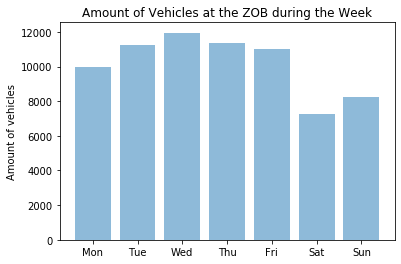

In [254]:
#als erstes wie viele sind über die Wochentage da als Plot
sorter = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sorterIndex = dict(zip(sorter,range(len(sorter))))
vehicles_station['Day_id'] = vehicles_station.index
vehicles_station['Day_id'] = vehicles_station['Day_of_week'].map(sorterIndex)
vehicles_station.sort_values('Day_id', inplace=True)
y_pos = np.arange(len(vehicles_station['Day_of_week']))
plt.bar(y_pos, vehicles_station['VEHICLE_HAL_ID'], align='center', alpha=0.5)
plt.xticks(y_pos, vehicles_station['Day_of_week'])
plt.ylabel('Amount of vehicles')
plt.title('Amount of Vehicles at the ZOB during the Week')

plt.show()

In [258]:
#Plot für einen Tag die Stunden
booking_vehicle_start_three = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicles_station_hour = booking_vehicle_start_three[booking_vehicle_start_three['START_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]
vehicles_station_hour

,START_RENTAL_ZONE,hour,VEHICLE_HAL_ID
3620,Hauptbahnhof Haupteingang (Vorplatz),00,1911
3621,Hauptbahnhof Haupteingang (Vorplatz),01,1974
3622,Hauptbahnhof Haupteingang (Vorplatz),02,1431
3623,Hauptbahnhof Haupteingang (Vorplatz),03,867
3624,Hauptbahnhof Haupteingang (Vorplatz),04,486
3625,Hauptbahnhof Haupteingang (Vorplatz),05,500
3626,Hauptbahnhof Haupteingang (Vorplatz),06,1743
3627,Hauptbahnhof Haupteingang (Vorplatz),07,6790
3628,Hauptbahnhof Haupteingang (Vorplatz),08,7803
3629,Hauptbahnhof Haupteingang (Vorplatz),09,3978


In [268]:
vehicles_station_hour['VEHICLE_HAL_ID'].sum()

70997

In [265]:
#now also get leaving bikes for the following plot
booking_vehicle_end = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'END_RENTAL_ZONE', 'END_RENTAL_ZONE_HAL_ID', 'VEHICLE_HAL_ID', 'Day_of_week', 'hour']]
booking_vehicle_end_two = booking_vehicle_end.groupby(["END_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicles_station_hour_end = booking_vehicle_end_two[booking_vehicle_end_two['END_RENTAL_ZONE'].str.contains('Hauptbahnhof Haupteingang')]
vehicles_station_hour_end

,END_RENTAL_ZONE,hour,VEHICLE_HAL_ID
3690,Hauptbahnhof Haupteingang (Vorplatz),00,668
3691,Hauptbahnhof Haupteingang (Vorplatz),01,562
3692,Hauptbahnhof Haupteingang (Vorplatz),02,501
3693,Hauptbahnhof Haupteingang (Vorplatz),03,420
3694,Hauptbahnhof Haupteingang (Vorplatz),04,430
3695,Hauptbahnhof Haupteingang (Vorplatz),05,773
3696,Hauptbahnhof Haupteingang (Vorplatz),06,1814
3697,Hauptbahnhof Haupteingang (Vorplatz),07,2605
3698,Hauptbahnhof Haupteingang (Vorplatz),08,2811
3699,Hauptbahnhof Haupteingang (Vorplatz),09,2139


In [267]:
vehicles_station_hour_end['VEHICLE_HAL_ID'].sum()

70728

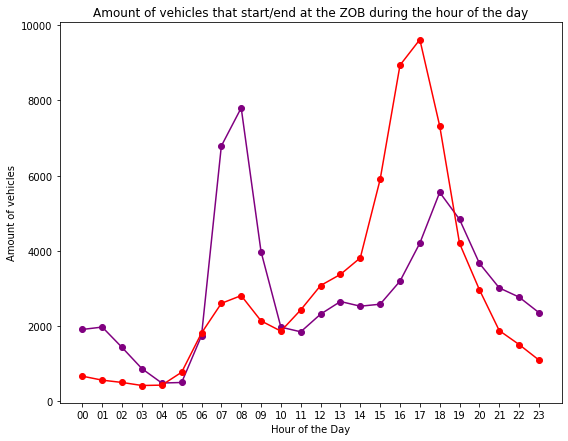

In [270]:
# Create the plot space upon which to plot the data 
fig, ax = plt.subplots(figsize=(9, 7))

# Add the x-axis and the y-axis to the plot
ax.plot(vehicles_station_hour['hour'],
        vehicles_station_hour['VEHICLE_HAL_ID'], '-o',
        color='purple')

ax.plot(vehicles_station_hour_end['hour'],
        vehicles_station_hour_end['VEHICLE_HAL_ID'], '-o',
        color='red')
# Set title and labels for axes
ax.set(xlabel="Hour of the Day",
       ylabel="Amount of vehicles",
       title="Amount of vehicles that start/end at the ZOB during the hour of the day")
plt.show()

In [ ]:
#now these are total amounts lets see what the mean says

In [287]:
vehicle_start_count = booking_vehicle_start.groupby(["START_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicle_start_count

,START_RENTAL_ZONE,hour,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,00,7
1,Ackermannstraße / Cordierstraße,01,3
2,Ackermannstraße / Cordierstraße,02,3
3,Ackermannstraße / Cordierstraße,03,6
4,Ackermannstraße / Cordierstraße,04,4
...,...,...,...
7433,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,19,75
7434,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,20,60
7435,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,21,29
7436,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,22,21


In [289]:
vehicle_start_mean = vehicle_start_count.groupby(["hour"], as_index = False)['VEHICLE_HAL_ID'].mean()
vehicle_start_mean['VEHICLE_HAL_ID']  = round(vehicle_start_mean['VEHICLE_HAL_ID']) #rude Werte
vehicle_start_mean

,hour,VEHICLE_HAL_ID
0,00,69.0
1,01,62.0
2,02,46.0
3,03,32.0
4,04,20.0
5,05,23.0
6,06,55.0
7,07,192.0
8,08,324.0
9,09,203.0


In [292]:
#same for end
vehicle_end_count = booking_vehicle_end.groupby(["END_RENTAL_ZONE", "hour"], as_index = False)['VEHICLE_HAL_ID'].count()
vehicle_end_count


,END_RENTAL_ZONE,hour,VEHICLE_HAL_ID
0,Ackermannstraße / Cordierstraße,00,13
1,Ackermannstraße / Cordierstraße,01,16
2,Ackermannstraße / Cordierstraße,02,14
3,Ackermannstraße / Cordierstraße,03,9
4,Ackermannstraße / Cordierstraße,04,9
...,...,...,...
7502,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,19,66
7503,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,20,52
7504,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,21,41
7505,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,22,19


In [293]:
vehicle_end_mean = vehicle_end_count.groupby(["hour"], as_index = False)['VEHICLE_HAL_ID'].mean()
vehicle_end_mean['VEHICLE_HAL_ID']  = round(vehicle_end_mean['VEHICLE_HAL_ID']) #rude Werte
vehicle_end_mean

,hour,VEHICLE_HAL_ID
0,00,69.0
1,01,62.0
2,02,46.0
3,03,31.0
4,04,19.0
5,05,22.0
6,06,58.0
7,07,195.0
8,08,326.0
9,09,201.0


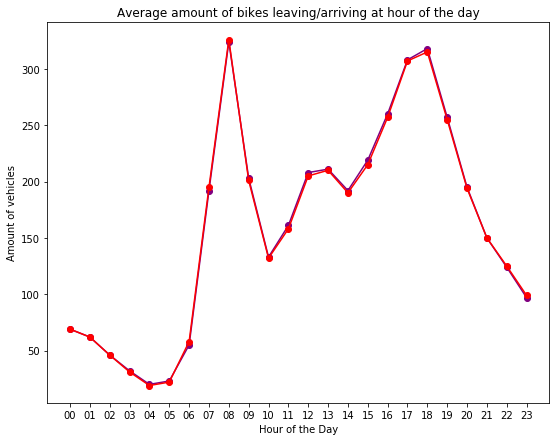

In [291]:
# Create the plot space upon which to plot the data 
fig, ax = plt.subplots(figsize=(9, 7))

# Add the x-axis and the y-axis to the plot
ax.plot(vehicle_start_mean['hour'],
        vehicle_start_mean['VEHICLE_HAL_ID'], '-o',
        color='purple')

ax.plot(vehicle_end_mean['hour'],
        vehicle_end_mean['VEHICLE_HAL_ID'], '-o',
        color='red')
# Set title and labels for axes
ax.set(xlabel="Hour of the Day",
       ylabel="Amount of vehicles",
       title="Average amount of bikes leaving/arriving at hour of the day")
plt.show()

In [ ]:
#select the columns that you need for the end station
booking_vehicle_end = booking_set_frankfurt_20152016.loc[:,['BOOKING_HAL_ID', 'END_RENTAL_ZONE', 'END_RENTAL_ZONE_HAL_ID', 'Day_of_week', 'hour']]

In [232]:
#see the distribution of stations 
start_stations_busy = booking_set_frankfurt_20152016.groupby(booking_set_frankfurt_20152016['START_RENTAL_ZONE'], as_index=False).size()

In [233]:
start_stations_busy.nlargest(10)

START_RENTAL_ZONE
Hauptbahnhof Haupteingang (Vorplatz)            70997
Hauptbahnhof / Taxistand                        26816
Konstablerwache                                 24484
Pfarrer-Perabo-Platz / Kleyerstraße             23920
Campus Westend Hörsaalzentrum                   23797
Opernplatz / Bockenheimer Landstaße             20264
Carlo-Schmidt-Platz  / Depot                    20125
Roßmarkt / An der Hauptwache                    18853
Bockenheimer Landstraße / Liebigstraße          17982
Jürgen-Ponto-Platz / Neckarstraße (DB-Tower)    16881
dtype: int64

In [234]:
start_stations_busy.nsmallest(10)

START_RENTAL_ZONE
Commerzbank DLZ                          1
Commerzbankhochhaus                      1
BSC Repeater                             2
Commerzbank Gallileo                     9
Bechtenwaldstraße / Hahnbergweg         30
S-Bahn Station Farbwerke                37
BSC Grafittihalle                       48
Hans-Böckler-Straße / Geißspitzweg      50
Sindlinger Bahnstraße / Farbenstraße    59
Bahnhof Bieber / Poststraße             62
dtype: int64

In [277]:
#für Strecken; guck die häufigsten Start Stationen, guck die häufigsten End Stationen, guck die wenigsten
#dann Kombi aus beiden; welche Strecken am häufigsten/wenigsten
routes = booking_set_frankfurt.groupby(['START_RENTAL_ZONE','END_RENTAL_ZONE']).size().reset_index().rename(columns={0:'count'})
routes

,START_RENTAL_ZONE,END_RENTAL_ZONE,count
0,Ackermannstraße / Cordierstraße,Ackermannstraße / Cordierstraße,135
1,Ackermannstraße / Cordierstraße,Ackermannstraße / Kleyerstraße,2
2,Ackermannstraße / Cordierstraße,Adam-Riese-Platz / Hafenstraße,3
3,Ackermannstraße / Cordierstraße,Adlerwerke Kleyerstrasse / Kriegkstrasse,9
4,Ackermannstraße / Cordierstraße,Affentorplatz,1
...,...,...,...
50922,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Wiesenhüttenplatz,2
50923,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Wilhelm-Leuschner-Straße/ Windmühlstraße,5
50924,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Woolworth Leipziger Strasse,3
50925,zzz4 vormals Sandhofschleife / Paul-Ehrlich-St...,Ziegelhüttenplatz / Ziegelhüttenweg,15


In [278]:
routes.sort_values(by=['count'])

,START_RENTAL_ZONE,END_RENTAL_ZONE,count
25463,Idsteiner Straße / Schneidhainer Straße,Mannheimer Straße / Stuttgarter Straße,1
38731,Ruth-Mufang-Straße / Riedbergallee,Nußzeil / Josephskirchstraße,1
38729,Ruth-Mufang-Straße / Riedbergallee,Messe Haupteingang / Friedrich-Ebert-Anlage,1
38726,Ruth-Mufang-Straße / Riedbergallee,Markgrafenstraße / Leipziger Straße,1
38724,Ruth-Mufang-Straße / Riedbergallee,Leonardo-da-Vinci-Allee / Am Römerhof,1
...,...,...,...
35933,Pfarrer-Perabo-Platz / Kleyerstraße,Hauptbahnhof Haupteingang (Vorplatz),5269
24463,Hauptbahnhof Haupteingang (Vorplatz),Hauptbahnhof Haupteingang (Vorplatz),5751
35996,Pfarrer-Perabo-Platz / Kleyerstraße,S-Bahn Station Galluswarte / Mainzer Landstraße,5913
24234,Hauptbahnhof / Taxistand,Pfarrer-Perabo-Platz / Kleyerstraße,6861


In [279]:
#ggf welche vehicles am meisten genutzt wurden und welche am wenigsten und dann gucken, auf welchen Strecken die waren
#obwohl das eigentlich überflüssig ist, wenn man schon die Anzahl der Buchungen auf die Stationen hat, oder?

In [ ]:
#maybe there is something to do with the customer hal id

# <font color='red'>Information on other files</font>

<font color='red'>Wo Hackaton steht, ist eine 2016 Datei, da keine 2017 vorhanden war. Open Data ist 2017 Datei. Informationen bezüglich der einzelnen Spalten sind nocht nicht aktualisiert.</font>

<p>Information to the data in the Vehicle file:<p>
The first two columns are keys to identify a vehicle. The rental object contain the columns to identify the rented vehicle in combination with the integrated computer (as in some kind of chip that identifies the vehicle). The rest of the columns contain information on the different vehicles, these can be cars AND bikes. It contains for example the producer of the vehicle, the how the model is called but also how far the vehicle has already driven and also the ownertype (leasing, bought etc). 
Notice that the Column named VEHICLE_TYPE_NAME is called VEHICLE_MODEL_TYPE in the Documentation on the DB website. 

In [35]:
vehicle_set = pd.read_csv("OPENDATA_VEHICLE_CALL_A_BIKE.csv", delimiter=';')

In [36]:
vehicle_set.columns

Index(['VEHICLE_HAL_ID', 'VEHICLE_MODEL_TYPE', 'VEHICLE_MANUFACTURER_NAME',
       'VEHICLE_MODEL_NAME', 'VEHICLE_TYPE_NAME', 'VIN', 'REGISTRATION_PLATE',
       'SERIAL_NUMBER', 'KW', 'FUEL_TYPE_NAME', 'OWNERSHIP_TYPE',
       'CAPACITY_AMOUNT', 'ACCESS_CONTROL_COMPONENT_TYPE', 'COMPANY',
       'COMPANY_GROUP'],
      dtype='object')

In [33]:
rental_zone_set = pd.read_csv("OPENDATA_RENTAL_ZONE_CALL_A_BIKE.csv", delimiter=';')

In [34]:
rental_zone_set.columns

Index(['RENTAL_ZONE_HAL_ID', 'RENTAL_ZONE_HAL_SRC', 'NAME', 'CODE', 'TYPE',
       'CITY', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'POI_AIRPORT_X',
       'POI_LONG_DISTANCE_TRAINS_X', 'POI_SUBURBAN_TRAINS_X',
       'POI_UNDERGROUND_X', 'ACTIVE_X', 'COMPANY', 'COMPANY_GROUP'],
      dtype='object')

<p>Information to the data in the efficiency file:<p>
The file contains information on the different bookings that have been done at certain dates (hence the first few columns are the keys for the booking, the date and the station). The long list of seconds_booked columns shows how long the booking was for the whole day in seconds. It is devided in apparently normal bookings and service bookings. The last few columns are the booking times in hours for normal and service bookings. 
Notice that the column that is here named "Expr1" is the VEHICLE_HAL_SRC in the documentation of the DB website (hence this might be a mistake. However, there is no such entry as Expr1 in the VEHICLE_HAL_SRC in the vehicle data file, so the column might as well be just named that way). Also notice that 3 columns aren't mentioned in the documentation of the DB website: HOURS_BOOKED_SERVICE, CATEGORY_HAL_ID and EFFECTIVE_CATEGORY_HAL_ID. 

In [4]:
efficiency_set = pd.read_csv("HACKATHON_EFFICIENCY_CALL_A_BIKE.csv", delimiter=';')

In [5]:
efficiency_set.columns

Index(['DAY_ID', 'DATE_DAY', 'BOOKING_HAL_ID', 'VEHICLE_HAL_ID', 'Expr1',
       'COMPANY_HAL_ID', 'SERVICE_BOOKING_X', 'RENTAL_ZONE_HAL_ID',
       'RENTAL_ZONE_HAL_SRC', 'RENTAL_POOL_HAL_ID', 'VEHICLE_COUNT',
       'SECONDS_BOOKED', 'SECONDS_BOOKED00', 'SECONDS_BOOKED01',
       'SECONDS_BOOKED02', 'SECONDS_BOOKED03', 'SECONDS_BOOKED04',
       'SECONDS_BOOKED05', 'SECONDS_BOOKED06', 'SECONDS_BOOKED07',
       'SECONDS_BOOKED08', 'SECONDS_BOOKED09', 'SECONDS_BOOKED10',
       'SECONDS_BOOKED11', 'SECONDS_BOOKED12', 'SECONDS_BOOKED13',
       'SECONDS_BOOKED14', 'SECONDS_BOOKED15', 'SECONDS_BOOKED16',
       'SECONDS_BOOKED17', 'SECONDS_BOOKED18', 'SECONDS_BOOKED19',
       'SECONDS_BOOKED20', 'SECONDS_BOOKED21', 'SECONDS_BOOKED22',
       'SECONDS_BOOKED23', 'SECONDS_BOOKED_D', 'SECONDS_BOOKED_D00',
       'SECONDS_BOOKED_D01', 'SECONDS_BOOKED_D02', 'SECONDS_BOOKED_D03',
       'SECONDS_BOOKED_D04', 'SECONDS_BOOKED_D05', 'SECONDS_BOOKED_D06',
       'SECONDS_BOOKED_D07', 'SECONDS_BO

<p>Information to the data in the availability file:<p>
The first few columns are the keys to identify the date, the vehicle and the station. The columns named availability show the availability of a vehicle in seconds for a certain hour of the day (as in for example availability at 10am). 
Notice that the documentation on the DB website is missing the column CATEGORY_HAL_ID. 

In [2]:
availability_set = pd.read_csv("HACKATHON_AVAILABILITY_CALL_A_BIKE.csv", delimiter=';')

In [3]:
availability_set.columns

Index(['DAY_ID;"DATE_DAY";"VEHICLE_HAL_ID";"VEHICLE_HAL_SRC";"COMPANY_HAL_ID";"RENTAL_ZONE_HAL_ID";"RENTAL_ZONE_HAL_SRC";"RENTAL_POOL_HAL_ID";"VEHICLE_COUNT";"AVAILABILITY";"AVAILABILITY00";"AVAILABILITY01";"AVAILABILITY02";"AVAILABILITY03";"AVAILABILITY04";"AVAILABILITY05";"AVAILABILITY06";"AVAILABILITY07";"AVAILABILITY08";"AVAILABILITY09";"AVAILABILITY10";"AVAILABILITY11";"AVAILABILITY12";"AVAILABILITY13";"AVAILABILITY14";"AVAILABILITY15";"AVAILABILITY16";"AVAILABILITY17";"AVAILABILITY18";"AVAILABILITY19";"AVAILABILITY20";"AVAILABILITY21";"AVAILABILITY22";"AVAILABILITY23";"CATEGORY_HAL_ID";"COMPANY";"COMPANY_GROUP"'], dtype='object')

<p>Information to the data in the category file:<p>
The columns contain the key and a few information such as name and company for the different categories (Tarifklassen). 

In [30]:
category_set = pd.read_csv("OPENDATA_CATEGORY_CALL_A_BIKE.csv", delimiter=';')

In [31]:
category_set.columns

Index(['HAL_ID', 'CATEGORY', 'COMPANY', 'COMPANY_GROUP'], dtype='object')

In [32]:
category_set

,HAL_ID,CATEGORY,COMPANY,COMPANY_GROUP
0,50000,Fahrrad,Call a Bike,Call a Bike
1,50001,Pedelec,Call a Bike,Call a Bike
2,51000,Fahrrad,StadtRAD Hamburg,Call a Bike
3,53000,Fahrrad,Konrad,Call a Bike


## Section for open questions/problems

<p>There are some open questions regarding certain terms on the documentation which will be asked in German here since the documentation is in German:<p>
    Zur Buchungsdatei: Was genau bedeuten die Begriffe Sperrkunden (etwa ein Kunde, der gesperrt ist? Aber wie kann ein gesperrter Kunde eine Buchung durchführen? BLOCK_CUSTOMER_X soll ja gerade das aussagen), Quernutzung (etwa dass man mehrere Buchungen gleichzeitig laufen hat?), "statistik-relevant" (heißt das für uns, die Daten, die nicht statistik-relevant sind, sind für unsere Statistik nicht relevant?), Rahmenunterbuchung (wenn man auf eine bestimmte Zeit gebucht hat, aber da drunter liegt am Ende?) und Rahmenoberbuchung (das Gegenteil von vorher?) sowie Metastandort (die erste Station?)? 